<a href="https://colab.research.google.com/github/Tarnished2/DataScientist/blob/main/Exercise_11_Muklis_Pramaditya_Ardian_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

Regresi linear sederhana berfungsi untuk mengetahui hubungan sebab akibat atau mengetahui pengaruh variabel faktor penyebab (X) terhadap variabel akibatnya (Y). 

## 1 Import Libraries and Data

Pada studi kasus simple linear regression menggunakan data dengan variabel independen (X) yaitu Sr dan variabel dependen Aroma. Pada studi kasus kali ini, ingin diketahui sejauh mana pengaruh konsentrasi Strontium (Sr) terhadap rating Aroma?

variabel independen (X) = Sr, menyatakan besarnya konsentrasi bahan Strontium (Sr).<br>
variable dependen (y) = Aroma, rating aroma. <br>

In [1]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [3]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. 
# Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = '/content/gdrive/MyDrive/SIB/4. Supervised Machine Learning - Regression/4.1 Linear Regression/'

In [4]:
os.listdir(path)

['[REV]_Meet_11_Breakout_Room_Simple_Linear_Regression.ipynb',
 'Data wine aroma.csv',
 'house_prices.csv',
 '[REV] Meet 11 Simple and Multiple Regression Analysis Part 1 (2).ipynb']

In [5]:
# Load data
wine_aroma = pd.read_csv(path+ "Data wine aroma.csv", usecols=["Sr", "Aroma"])

# Display 5 data teratas
wine_aroma.head()

,Sr,Aroma
0,1.230,3.3
1,1.050,4.6
2,1.140,3.9
3,0.156,7.1
4,1.130,5.6


## 2 Exploratory Data Analysis (EDA) & Data Pre-Processing

### Summary Data

In [6]:
# mendapatkan informasi data
wine_aroma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sr      41 non-null     float64
 1   Aroma   41 non-null     float64
dtypes: float64(2)
memory usage: 784.0 bytes


In [7]:
# melakukan analisis deskriptif
wine_aroma.describe()

,Sr,Aroma
count,41.000000,41.000000
mean,0.800512,4.924390
std,0.445945,1.023177
min,0.156000,3.300000
25%,0.360000,4.300000
50%,0.898000,5.000000
75%,1.120000,5.500000
max,2.140000,7.700000


### Missing Value

Missing value adalah data yang hilang, atau nilai yang hilang, terjadi ketika tidak ada nilai data yang disimpan untuk variabel dalam pengamatan. Kita ingin melakukan identifikasi, apakah terdapat data yang missing atau tidak dalam observasi pengamatan.

In [8]:
# Cek missing value
wine_aroma.isna().sum()

Sr       0
Aroma    0
dtype: int64

dari hasil output diatas, tidak ada data yang hilang

### Duplicated Data

Melakukan identifikasi, apakah terdapat data/observasi yang sama atau tidak, apabila ada data yang terduplikasi maka data duplikasi harus dihapus.

In [9]:
# Cek duplicate
duplicate = wine_aroma[wine_aroma.duplicated(keep=False)]
duplicate

,Sr,Aroma
8,0.186,5.5
10,0.491,5.1
20,0.186,5.5
21,0.720,5.1
33,0.720,5.1
37,0.491,5.1


In [10]:
# drop duplicate
wine_aroma.drop_duplicates(inplace=True)

In [11]:
# Cek ukuran data apakah duplicate sudah terhapus
wine_aroma.shape

(38, 2)

setelah dilakukan penghapusan data duplikat, dari 40 data menjadi 38 data

### Adjusting the type of variable

In [12]:
wine_aroma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sr      38 non-null     float64
 1   Aroma   38 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


tipe data kedua variabel sudah sesuai

### Uji Asumsi sebelum Pemodelan Regresi Linier Sederhana

Asumsi yang perlu dipenuhi sebelum dilakukannya pemodelan regresi linier sederhana yaitu data berdistribusi normal (normalitas data) dan hubungan linier antara variabel prediktor (independen) dan variabel respon (dependen), karena variabel prediktornya ada 1 variabel maka tidak perlu uji asumsi gejala multikolinieritas.

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data. Uji Normalitas data perlu dilakukan juga untuk mengetahui keberadaan ourlier (data pencilan) dan normalitas data variabel respon (dependen) agar bisa diatasi.

#### Uji Nomalitas Data

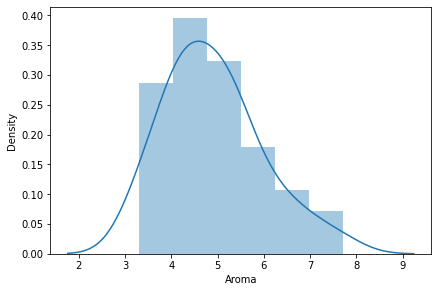

In [13]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,10))
plt.subplot(222)
sns.distplot(wine_aroma["Aroma"])

plt.show()

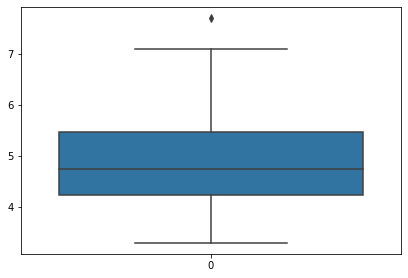

In [14]:
# Cek normalitas data dengan boxplot
plt.figure(figsize=(15,10))
plt.subplot(222)
sns.boxplot(wine_aroma["Aroma"])
plt.show()

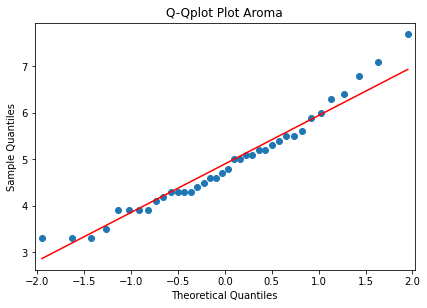

In [15]:
# Cek normalitas data dengan Q-Q plot
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(2,2,2)
sm.graphics.qqplot(wine_aroma["Aroma"].dropna(), line='s', ax=ax)
top = ax.get_ylim()[1] * 0.75
plt.title('Q-Qplot Plot Aroma')


plt.show()

> Insight Grafik:
*   Histogram 
*   Boxplot 
*   Q-Q Plot

Pengecekan normalitas data secara visual tidak dapat ditarik kesimpulan sehingga perlu dilakukan pengujian hipotesis berikut:
<br>
<br>
Ho: Data berdistribusi Normal <br>
H1: Data tidak berdistribusi Normal
<br>
<br>
Bila p-value kurang dari 0.05 maka Ho Ditolak, berarti Data tidak berdistribusi Normal
Bila p-value lebih dari 0.05 maka Ho Diterima, berarti Data berdistribusi Normal.
<br>
<br>
Salah satu Uji Distribusi Normalitas Data yaitu Uji Shapiro-Wilk.

In [16]:
# Uji Shapiro-Wilk
from scipy.stats import shapiro
stat_y, pval_y = shapiro(wine_aroma["Aroma"])

print(f"p value uji normalitas data Aroma = {round(pval_y,4)}")

p value uji normalitas data Aroma = 0.1817


> Hasil pengujian menunjukkan bahwa p-value > 0.05 maka gagal tolak H0 yang berarti variabel aroma berdistribusi normal

> Karena data outliers sedikit dan tidak mempengaruhi normalitas data, kita dapat mengabaikannya. Tetapi apabila normalitas data dipengaruhi oleh adanya outliers maka dapat dilakukan trimming/penghapusan data outliers, menambah data observasi, atau menggunakan metode Robust Regression. Selain itu, data outliers ini dalam pengaplikasian yang sesungguhnya perlu dianalisis ulang untuk dicari tau karakteristiknya lebih dalam.

#### Uji Linearitas Data

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

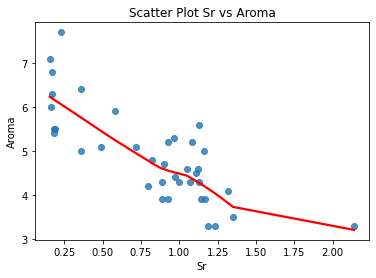

In [17]:
# Keterkaitan x dengan y
sns.regplot(x=wine_aroma["Sr"], y=wine_aroma["Aroma"], lowess=True, line_kws={'color':'red'})
plt.xlabel('Sr')
plt.ylabel('Aroma')
plt.title('Scatter Plot Sr vs Aroma')
plt.show()

grafik diatas menunjukkan persebaran data (titik biru), berkumpul di garis linier (merah), sehingga antara Sr dan Aroma terdapat hubungan

## 3 Membangun Model Regresi

In [18]:
X = wine_aroma["Sr"].values.reshape(-1,1)
y = wine_aroma["Aroma"].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [19]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  26
Ukuran X test  12
Ukuran y train  26
Ukuran y test  12


###Membangun model dengan Sklearn

In [20]:
# membuat model
LR = LinearRegression()
LR.fit(X,y)

LinearRegression()

In [21]:
print("Intercept Linear Regression model : ", LR.intercept_)
print("Coef Linear Regression model : ",LR.coef_)

Intercept Linear Regression model :  [6.44129785]
Coef Linear Regression model :  [[-1.86384032]]


In [22]:
# membuat prediksi model
prediction_train = LR.predict(X)

#tampilkan dalam bentuk data frame
df_linreg_train = pd.DataFrame(X, columns=["Sr"])
df_linreg_train["Aroma"] = y
df_linreg_train["prediction_Aroma"] = prediction_train
df_linreg_train.head()

,Sr,Aroma,prediction_Aroma
0,1.230,3.3,4.148774
1,1.050,4.6,4.484266
2,1.140,3.9,4.316520
3,0.156,7.1,6.150539
4,1.130,5.6,4.335158


In [23]:
# memasukkan residual kedalam dataframe
df_linreg_train["residual"] = y - prediction_train

In [24]:
df_linreg_train.head()

,Sr,Aroma,prediction_Aroma,residual
0,1.230,3.3,4.148774,-0.848774
1,1.050,4.6,4.484266,0.115734
2,1.140,3.9,4.316520,-0.416520
3,0.156,7.1,6.150539,0.949461
4,1.130,5.6,4.335158,1.264842


#### Asumsi Analisis Regresi

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

**Asumsi Residual Distribusi Normal**

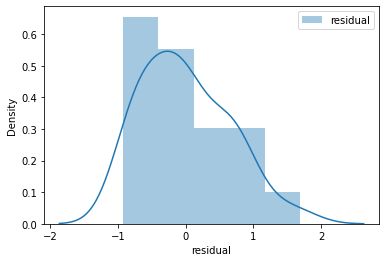

In [25]:
# melihat distribusi residual dengan visaulisasi
sns.distplot(df_linreg_train["residual"], label="residual")
plt.legend()
plt.show()

In [26]:
# uji shapiro-wilk
from scipy.stats import shapiro
stat_e, pval_e = shapiro(df_linreg_train["residual"])

print(f"p value uji normalitas data Residual = {pval_e}")

p value uji normalitas data Residual = 0.13238993287086487


karena hasil uji distribusi Residual p-value > 0.05 maka gagal Tolak H0 yang berarti Residual berdistribusi normal.

**Asumsi No autokorelasi**

Uji Durbin watson akan menghasilkan nilai Durbin Watson (DW) yang nantinya akan dibandingkan dengan dua (2) nilai Durbin Watson Tabel, yaitu Durbin Upper (DU) dan Durbin Lower DL). Dikatakan tidak terdapat autokorelasi jika nilai DW > DU dan (4-DW) > DU atau bisa dinotasikan juga sebagai berikut: (4-DW) > DU < DW.

In [27]:
statsmodels.stats.stattools.durbin_watson(df_linreg_train['residual'], axis=0)

1.6860867086459665

DU dapat diketahui dari tabel Durbin Watson dengan n=38 dab k=1 (dengan n adalah banyak observasi, k adalah jumlah variabel independen), sehingga (4-DL)>DU<DL didapatkan 2.314 > 1.427 < 1.686 maka dapat disimpulkan tidak terjadi autokorelasi dan asumsi terpenuhi

**Asumsi Homoskedastisitas**

Uji Homoskedastisiitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain.

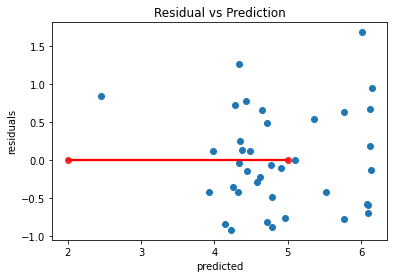

In [28]:
asm_homosk = plt.scatter(df_linreg_train["prediction_Aroma"], df_linreg_train["residual"])
plt.xlabel('predicted')
plt.ylabel('residuals')
asm_homosk = sns.regplot(x=[2,5],y=[0,0],color='red')
asm_homosk = plt.title('Residual vs Prediction')

karena titik biru menyebar dan tidak membentuk corong atau bentuk tertentu, sehingga dapat dikatakan Homoskedastisitas Residual terpenuhi.

#### Evaluasi Model

In [29]:
# R-square
print('R-square predicted training :', metrics.r2_score(df_linreg_train['Aroma'], df_linreg_train['prediction_Aroma']))

R-square predicted training : 0.6240808118800623


variabel konsentrasi Sr dapat menjelaskan rating Aroma sebesar 62%.

In [30]:
# MSE
print('MSE predicted training :', metrics.mean_squared_error(df_linreg_train['Aroma'], df_linreg_train['prediction_Aroma']))

MSE predicted training : 0.4101476194592795


### Membangun model dengan package Statsmodels

In [31]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X)

In [32]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y, Input, missing='drop')
results = SimpleModel.fit()

In [33]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     59.77
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           3.70e-09
Time:                        19:31:21   Log-Likelihood:                -36.986
No. Observations:                  38   AIC:                             77.97
Df Residuals:                      36   BIC:                             81.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4413      0.226     28.483      0.0

### Uji Partial & Serentak Analisis Regresi

Uji Parameter T-test  memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [34]:
t_test_const, t_test_X1 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)

T-test score const:  28.482972522834373
T-test score X1:  -7.730799649496353


In [35]:

p_value_const, p_value_X1 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)

P-value const:  2.7457309033140716e-26
P-value X1:  3.7000669550200655e-09


p-value untuk variabel Sr kurang dari 0.05 sehingga hipotesis null ditolak dan dapat disimpulkan bahwa konsentrasi Sr memberikan pengaruh pada rating Aroma, sehingga pembentukan model regresi dari kedua variabel dapat dilakukan

Uji kelayakan model F-test memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak

In [36]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  59.76526322065298
P-value :  3.7000669550200283e-09
Tolak H0


diperoleh nilai p-value kurang dari 0.05 sehingga hipotesis null ditolak dan dapat disimpulkan bahwa model regresi dari variabel independen Sr dan variabel Aroma layak digunakan